# Init

In [1]:
%%capture
import importlib
from cycler import cycler
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import sys
sys.path.insert(0, 'geo')
sys.path.insert(0, 'bandstructure')

import caustic_frame
importlib.reload(caustic_frame)

import caustic_bandstructure
importlib.reload(caustic_bandstructure)

from delafossite_bandstructure import delafossite

# Set default plotting parameters

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['#E24A33','#348ABD','#988ED5','#777777',
           '#FBC15E','#8EBA42','#FFB5B8'])

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 1


plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize']=12

# Generate frame

We load in a dxf file and generate a frame for the simulation. The frame consists of a collection of edges (a helper class where we easily story information about a given edge, such as its vertices and layer). 

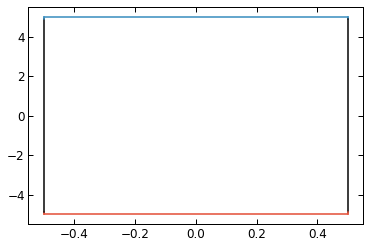

In [2]:
frame = caustic_frame.Frame('geo/bar.dxf')
frame.gen_fig();

In [3]:
frame.edges

[((-0.5, 5.0), (0.5, 5.0), 2),
 ((0.5, 5.0), (0.5, 4.9), 2),
 ((0.5, 4.9), (0.5, -4.9), 0),
 ((0.5, -4.9), (0.5, -5.0), 1),
 ((0.5, -5.0), (-0.5, -5.0), 1),
 ((-0.5, -5.0), (-0.5, -4.9), 1),
 ((-0.5, -4.9), (-0.5, 4.9), 0),
 ((-0.5, 4.9), (-0.5, 5.0), 2)]

# Bandstructure

Next, we call the delafossite function, which returns a list of k's which we then input into a Bandstructure. 

This Bandstructure class and do things such as rotate the Fermi surface and generate the real space trajectories for a given field. 

In [4]:
k = delafossite()
bs = caustic_bandstructure.Bandstructure(k, 0, 10)

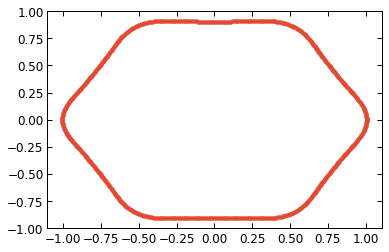

In [5]:
plt.figure()
plt.plot(bs.k[0], bs.k[1], '.')

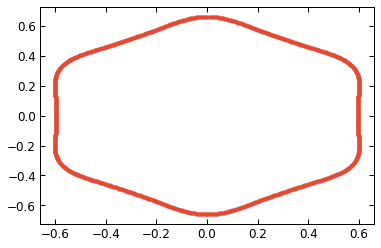

In [6]:
plt.figure()
plt.plot(bs.r[0], bs.r[1], '.')

Switching the sign of the field switches the direction the Fermi surface is indexed (i.e. $2 \pi$ to $0$ instead of $0$ to $2 \pi$.

In [7]:
k = delafossite()
bs = caustic_bandstructure.Bandstructure(k, 0, -10)

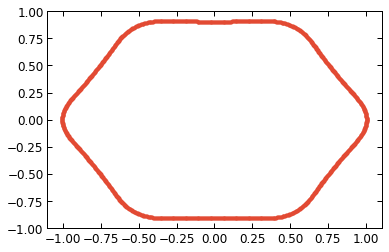

In [17]:
plt.figure()
plt.plot(bs.k[0], bs.k[1], '.')

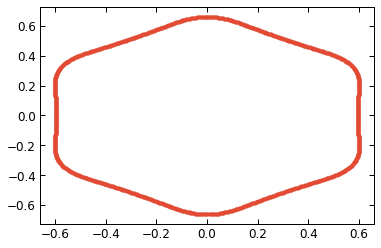

In [18]:
plt.figure()
plt.plot(bs.r[0], bs.r[1], '.')

# Simulation

In [11]:
layer = 2
inds = []
n = 10000
freq = np.zeros(10)
for i in range(n):
    (x,y), edge = frame.get_inject_position(layer)
    print(x,y)
    for ind,testedge in enumerate(frame.edges):
        if edge == testedge:
            inds.append(ind)
            freq[ind] += 1

prob = freq/n
print(prob)

0.4306479667197177 5.0
-0.4459049494232979 5.0
-0.13143104817311507 5.0
0.12107492629837235 5.0
-0.2702185277942929 5.0
-0.3777633833634712 5.0
-0.06558374687667562 5.0
0.483147076502498 5.0
0.06876591039991475 5.0
-0.20673507429257443 5.0
0.3211884276289091 5.0
-0.4500313962041267 5.0
-0.0448702217720327 5.0
0.3169459166415737 5.0
-0.31289307213933504 5.0
0.37318102817235466 5.0
-0.04677781202411746 5.0
-0.2912907412043676 5.0
0.2369241815697133 5.0
0.06352208032950968 5.0
0.18409885119977587 5.0
-0.4583900749308827 5.0
-0.3808171962034203 5.0
-0.22412864698792012 5.0
-0.022078870752145707 5.0
-0.3580328456096926 5.0
-0.32647161812082715 5.0
-0.2553566271981361 5.0
0.025562840526525354 5.0
-0.23889529781069208 5.0
0.48361256863522306 5.0
-0.12445738040098125 5.0
-0.30887497825419546 5.0
0.05509555571497149 5.0
-0.4172265977129669 5.0
0.02334754089001878 5.0
0.4874264911687006 5.0
-0.10747378048269485 5.0
0.4433589498504823 5.0
0.1985233296016078 5.0
0.09706291610303186 5.0
-0.33961655

0.3761692029698075 5.0
-0.2162622263568238 5.0
0.11780044842792059 5.0
-0.36916801071992866 5.0
0.1801786427888714 5.0
0.24614358211461862 5.0
0.21011624490246184 5.0
-0.0738259545351892 5.0
0.13647676941369702 5.0
-0.06202634628773973 5.0
0.037800173819576344 5.0
-0.034106392168720634 5.0
0.3397724565903929 5.0
0.10339568425429246 5.0
-0.04099608396090293 5.0
0.4086101131113906 5.0
0.26551062509345225 5.0
0.32105581991025045 5.0
0.1598177695510452 5.0
0.3556297887373969 5.0
-0.061676046486109914 5.0
-0.08583822115456441 5.0
-0.43422894151598546 5.0
-0.14354949648097542 5.0
0.4305012934267285 5.0
-0.1402058102541442 5.0
0.18941778700562983 5.0
-0.07734154826176565 5.0
0.21183088366086023 5.0
0.1423185030962132 5.0
-0.4431636334713059 5.0
0.08367004637894027 5.0
-0.4260911751908537 5.0
0.25076033660259545 5.0
0.43852076152992026 5.0
-0.02882125541781766 5.0
0.297711986243111 5.0
0.43504327496823003 5.0
0.4860472819011299 5.0
-0.06545327921265504 5.0
-0.11015071006439336 5.0
0.1794811369

-0.4180475876361178 5.0
0.2813698713747417 5.0
0.494808339882278 5.0
-0.41590438836964433 5.0
-0.43275447353733465 5.0
0.2840722168717751 5.0
0.34286332102750305 5.0
0.46767507804173747 5.0
-0.21235440113627896 5.0
0.0049670905223132555 5.0
-0.34993793646868465 5.0
-0.22330433062912047 5.0
-0.053081588870931395 5.0
-0.3202403241394782 5.0
0.47682342301890757 5.0
0.17996340218934648 5.0
0.4998381580201702 5.0
-0.10861386504062231 5.0
-0.005376311572808601 5.0
0.20401002992180528 5.0
0.141776597088498 5.0
0.26145310876099126 5.0
-0.0038846927581851487 5.0
0.34408844562754726 5.0
-0.49841321370552927 5.0
0.48373579823183643 5.0
0.3345343936016154 5.0
0.49617780626639685 5.0
-0.20521615520398429 5.0
0.1163688165609309 5.0
0.23902205538718257 5.0
-0.3526068167110875 5.0
0.33904465549193574 5.0
-0.016360161958138553 5.0
-0.3922046013227217 5.0
-0.11247135289485344 5.0
-0.2968372882866853 5.0
-0.15074521643960603 5.0
0.314946641273504 5.0
-0.32720532894108395 5.0
0.400703590945673 5.0
0.40850

-0.37924065002392005 5.0
0.035100734154638435 5.0
-0.12688840760650366 5.0
0.3690582233965314 5.0
-0.2640853453577153 5.0
-0.24514711133357597 5.0
0.0886560658264618 5.0
-0.3453427166635631 5.0
-0.2710302823211913 5.0
0.3900183980908848 5.0
-0.04823466916955271 5.0
0.34873697544652016 5.0
0.3604465630911432 5.0
0.23457579144747265 5.0
-0.44737265312972235 5.0
0.2544959702560491 5.0
0.3686052966630443 5.0
0.18084394602060694 5.0
0.3444827277478131 5.0
-0.08760364432394285 5.0
0.273342087408448 5.0
0.3252141454483134 5.0
0.24716503221602415 5.0
-0.13297341167694648 5.0
0.012145614558876305 5.0
-0.353007204771584 5.0
-0.44180309808850005 5.0
0.1403724559486127 5.0
0.38247967737341904 5.0
0.12639862491539477 5.0
0.08330428405339685 5.0
-0.2659792767555167 5.0
0.08984889790704276 5.0
0.24397936414826138 5.0
-0.09206540498428667 5.0
-0.026509517068719846 5.0
0.4468524842656778 5.0
0.1731792199395049 5.0
-0.46015299638093626 5.0
0.16054143069730376 5.0
0.16226801700702798 5.0
0.30476001897716

-0.1802186961455569 5.0
0.40540636053164425 5.0
0.05831511875892137 5.0
0.24247886501578908 5.0
0.2834164006874048 5.0
-0.47320166400314617 5.0
-0.21489648650659593 5.0
-0.16857701004768633 5.0
-0.1867171708372794 5.0
0.3596793210055448 5.0
-0.21374788481145407 5.0
0.05173059390160284 5.0
-0.12870713839329323 5.0
-0.10581090971275031 5.0
-0.27351579174364865 5.0
0.15868488661139668 5.0
-0.3708362707509726 5.0
0.273055562050582 5.0
0.05957914390479757 5.0
-0.4733264838666805 5.0
-0.08797319895093547 5.0
-0.0745107252616164 5.0
0.24713991399767588 5.0
0.33998194348828337 5.0
0.30582164764734476 5.0
0.44097466263674334 5.0
-0.39929071969671903 5.0
0.05049378406223515 5.0
0.03777176771512969 5.0
0.41054624961941766 5.0
0.4177038936299786 5.0
0.07621316020856461 5.0
0.3059362608583146 5.0
0.4262514482171279 5.0
-0.14122219816377662 5.0
0.27014308176908475 5.0
-0.2588974085649627 5.0
0.13300673327734958 5.0
-0.23127888842513483 5.0
0.09241262026619468 5.0
-0.019629929628361686 5.0
0.37319932

-0.1824111399869512 5.0
-0.42436613163318904 5.0
0.38187296764217393 5.0
0.4631030890374258 5.0
-0.015794168325219626 5.0
0.09639146634513451 5.0
0.04013445395020909 5.0
-0.4719915524448353 5.0
-0.398653063130439 5.0
0.17050139094662475 5.0
-0.16312899314412632 5.0
-0.48076877014195185 5.0
-0.08812451757772649 5.0
0.24648431135876747 5.0
-0.004352364758404614 5.0
-0.12656470790316454 5.0
-0.04329393627041056 5.0
0.3350570882651671 5.0
-0.1802452891922095 5.0
-0.18547833786866563 5.0
0.24039585447841538 5.0
-0.30214777488253064 5.0
0.45017553822002054 5.0
0.36310865191292885 5.0
0.36475435157594627 5.0
0.36062700909116796 5.0
-0.0842725545559016 5.0
0.14905560209429225 5.0
-0.25387286987633084 5.0
-0.10735570649541992 5.0
-0.15829042986864994 5.0
0.010165639539306937 5.0
-0.2048570102803443 5.0
0.07654645440124275 5.0
0.14685075638851164 5.0
-0.13910472185800804 5.0
-0.07782240903176152 5.0
0.0863889777203094 5.0
0.41815042376831213 5.0
0.12736020914959956 5.0
0.3032790448763595 5.0
-0.

-0.22693276086503356 5.0
-0.33630718432887674 5.0
-0.30710605184406686 5.0
0.048896671651870394 5.0
-0.058557776587135346 5.0
0.2514903644783003 5.0
0.38560296235863134 5.0
0.05856984063416537 5.0
0.3420585547171382 5.0
0.2673075061122522 5.0
-0.3291156186218037 5.0
0.07206051981299644 5.0
0.02502445138862308 5.0
-0.25076219896421537 5.0
-0.3557631727573091 5.0
0.023921664388377062 5.0
-0.3960389573159071 5.0
-0.49215824306308065 5.0
0.3949510614396283 5.0
-0.1732841128864961 5.0
0.47002857884050475 5.0
-0.015537385245476043 5.0
-0.2711864760289935 5.0
0.4198121899089191 5.0
0.23364255599846828 5.0
-0.42316521771571003 5.0
0.3988302886727033 5.0
-0.44914188312980613 5.0
0.19220990342170596 5.0
-0.18303466702123306 5.0
0.4149196103095494 5.0
-0.07564938941876459 5.0
-0.28460820640842077 5.0
0.4969452030013528 5.0
-0.1851515723667163 5.0
-0.44864145332659233 5.0
0.30319453677125197 5.0
-0.46341237459994067 5.0
-0.3938240930348811 5.0
0.26408011064656933 5.0
0.3729831354918478 5.0
0.38926

0.1595803869236735 5.0
0.31086800168595385 5.0
-0.47915151418811514 5.0
0.16625231838411103 5.0
0.04638971314300966 5.0
-0.08836452585832094 5.0
-0.10191410289951425 5.0
-0.2905906096149128 5.0
0.18281294273568593 5.0
-0.3594834598726253 5.0
-0.3327213009109057 5.0
-0.27122007265350095 5.0
0.05126586609584072 5.0
-0.24759907420245453 5.0
-0.17218602833508917 5.0
0.20959889311916424 5.0
5.586728789697126e-05 5.0
0.051208436027446624 5.0
0.012565522263433437 5.0
0.3507696502857742 5.0
0.4029024998040627 5.0
-0.3855483448289215 5.0
-0.20745184922667692 5.0
-0.44580979178654784 5.0
0.29321038424053314 5.0
-0.37195457580026825 5.0
0.349941971418403 5.0
-0.339312944740207 5.0
-0.18888342963248184 5.0
-0.30405417508702587 5.0
-0.34126525832150834 5.0
0.3413485452268895 5.0
-0.28717087975610395 5.0
-0.10402086577508352 5.0
0.4111725870409946 5.0
-0.04508004001867716 5.0
0.3937402113549565 5.0
-0.09937785051939968 5.0
-0.21076649324181412 5.0
0.2642489580874212 5.0
0.12265105295594447 5.0
0.340

0.2840666830501881 5.0
-0.45887845271191063 5.0
0.28637939776911103 5.0
0.07182358247590592 5.0
0.11766091989849359 5.0
0.05051220387467348 5.0
0.3646477878656339 5.0
-0.04879280752758591 5.0
0.2576089290232575 5.0
0.19463110715913223 5.0
0.2801086361098859 5.0
0.15944588140578964 5.0
-0.2842500799184617 5.0
0.12159609913180391 5.0
-0.2871420891053563 5.0
0.17007403278202005 5.0
-0.08776717153563329 5.0
-0.2174891705891246 5.0
-0.3739626158352573 5.0
-0.06087732700360077 5.0
-0.016496402761548457 5.0
0.23842526011812204 5.0
0.11490127976064679 5.0
0.27577319461661853 5.0
0.12427096479881417 5.0
0.3054565159110819 5.0
0.2608987557501474 5.0
-0.004311064234726547 5.0
-0.3786735940993812 5.0
0.09910894750039823 5.0
-0.4425290754968925 5.0
0.0003043912780286151 5.0
0.11434226974974182 5.0
-0.06081523528214011 5.0
0.06192304147246319 5.0
0.2990600408609184 5.0
0.40976113183347573 5.0
0.10577083213966942 5.0
0.203670386399055 5.0
0.17203137575536787 5.0
0.38970801739089955 5.0
-0.46096938546

-0.49714487534804597 5.0
0.47655696985270335 5.0
-0.1211684426617321 5.0
-0.4251754699099376 5.0
0.34058279221939824 5.0
0.026325542566649873 5.0
-0.2559809251176082 5.0
-0.08114890444052225 5.0
-0.4249034006816493 5.0
0.26747931250769086 5.0
-0.2067583815294845 5.0
0.29447432660490713 5.0
-0.3872128440465523 5.0
0.041152765623655885 5.0
-0.03219734732585977 5.0
0.057619790189106235 5.0
-0.30148292282980765 5.0
0.33687754542608306 5.0
0.49876139134805264 5.0
0.03950649499772163 5.0
0.13385231381735185 5.0
0.1654805071378035 5.0
0.10222964353714892 5.0
0.2671142399801659 5.0
-0.17819373148621787 5.0
-0.45379120327663686 5.0
0.1487212502568892 5.0
-0.22276893462656422 5.0
0.1425712141926927 5.0
-0.010755901925962819 5.0
-0.2771364122225637 5.0
0.17119881669560566 5.0
0.10463322533692576 5.0
0.11039144120146971 5.0
-0.3288535854840737 5.0
0.0026900067546004047 5.0
-0.06261077074344962 5.0
-0.2365243454623318 5.0
0.41843044791805606 5.0
0.4329950390590045 5.0
0.1677536458814105 5.0
-0.3933

0.2504081052150702 5.0
-0.18401993286376028 5.0
-0.1557096321133808 5.0
0.2040755347734332 5.0
-0.44192629286844404 5.0
0.2602360232483526 5.0
0.4873940947554507 5.0
0.019012369954350183 5.0
-0.24728614430023338 5.0
-0.09866281781175118 5.0
-0.2750126346985675 5.0
0.32735060837841334 5.0
0.2586110014266243 5.0
-0.34846788318301425 5.0
-0.314729234874226 5.0
0.08614525380317717 5.0
0.28740781040419405 5.0
0.42331524284202793 5.0
0.2723044616901379 5.0
0.0604401128109181 5.0
-0.2903939481627593 5.0
-0.255893679932401 5.0
-0.1024669455862025 5.0
-0.34408803325045506 5.0
-0.3481764512619714 5.0
0.2243944390573691 5.0
-0.2077050606523842 5.0
0.43469100741211575 5.0
-0.16427274374252204 5.0
0.45605306919072597 5.0
-0.46736969811653184 5.0
-0.42991099425241874 5.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
bs.calculate_injection_probs(0)

In [13]:
bs.in_prob.keys()

dict_keys([0])

0


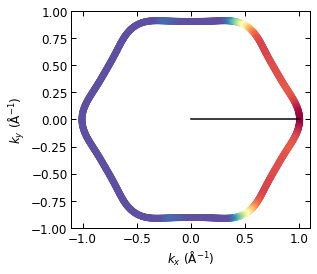

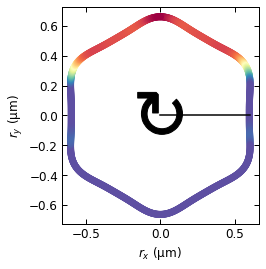

In [14]:
cmap = plt.get_cmap('Spectral_r')

for key in bs.in_prob.keys():
    print(key)
    max_p = np.max(bs.in_prob[key])
    colors = np.array([cmap(p/max_p) for p in bs.in_prob[key]])
    colors = np.append(colors, [colors[0]], axis=0)
    
    fig, ax = plt.subplots()
    plt.plot((0, (np.max(bs.k[0]*np.cos(key)))*np.cos(key)), (0, (np.max(bs.k[1]*np.sin(key)))*np.sin(key)),'k')
    plt.scatter(bs.k[0], bs.k[1],c=colors)
    plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
    plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
    ax.set_aspect('equal')
    
    fig, ax = plt.subplots()
    plt.plot([-0.02], [0], marker=r'$\circlearrowright$', ms=50, color='k')
    plt.plot((0, (np.max(bs.r[0]*np.cos(key)))*np.cos(key)), (0, (np.max(bs.r[1]*np.sin(key)))*np.sin(key)),'k')
    plt.scatter(bs.r[0], bs.r[1],c=colors)
    plt.xlabel(r'$r_x\ (\mathrm{\mu m})$')
    plt.ylabel(r'$r_y\ (\mathrm{\mu m})$')
    ax.set_aspect('equal')

In [15]:
inds = []
n = 10000
freq = np.zeros(999)

for i in range(n):
    ind = bs.get_injection_index(0)
    inds.append(ind)
    freq[ind] += 1
    
prob = freq/n

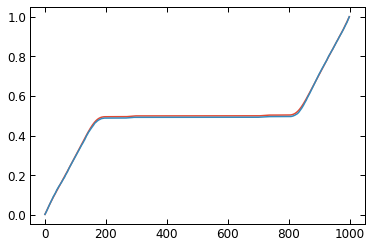

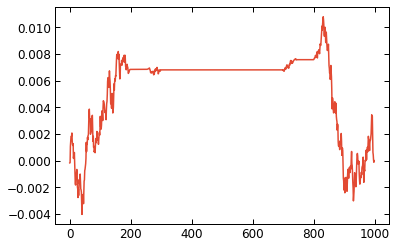

In [16]:
plt.figure()
plt.plot(bs.cum_prob[0])
plt.plot(np.cumsum(prob))

plt.figure()
plt.plot(bs.cum_prob[0]-np.cumsum(prob))